
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate=0, annual_returns='3 Yr')
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
0,AA,Alcoa,US Stocks:Materials,-60.31,-55.09,13.84,-24.18,30.29,52.40,35.63,46.83,53.85,61.86,-24.18,53.85,-1302.09
1,AAL,American Airlines Group,US Stocks:Industrials,-99.20,-85.08,-22.13,-8.74,-8.56,48.65,36.87,45.39,44.09,43.30,-8.74,44.09,-385.35
2,AAON,AAON,US Stocks:Industrials,-96.86,-83.65,3.06,31.46,19.49,95.43,79.59,52.51,43.80,38.29,31.46,43.80,0.72
3,ACHC,Acadia Healthcare,US Stocks:Healthcare,-98.81,-73.74,-64.46,-23.54,1.68,93.66,85.93,56.69,40.79,41.98,-23.54,40.79,-960.20
4,ACI,Albertsons,US Stocks:Consumer Staples,-23.68,73.41,3.33,-4.66,-4.66,32.13,19.01,14.25,17.36,28.57,-4.66,17.36,-80.90
5,ACM,AECOM,US Stocks:Industrials,-65.07,-48.42,4.46,9.69,19.94,27.64,16.29,20.56,22.80,24.70,9.69,22.80,0.42
6,ADC,Agree Realty,US Stocks:Real Estate,153.11,21.51,40.48,11.16,4.61,16.41,7.73,15.68,18.26,17.69,11.16,18.26,0.61
7,AFG,American Financial Group,US Stocks:Financials,23.40,-28.50,3.19,5.66,19.35,18.52,9.11,23.08,22.08,23.58,5.66,22.08,0.26
8,AGCO,AGCO,US Stocks:Industrials,-34.27,-15.06,-14.36,-5.78,13.35,52.64,28.57,21.07,32.87,32.94,-5.78,32.87,-189.99
9,AIT,Applied Industrial Technologies,US Stocks:Industrials,-82.29,-52.04,22.13,31.30,37.30,36.53,29.12,32.32,27.56,29.19,31.30,27.56,1.14


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,SD 1 Yr,SD 3 Yr,SD 5 Yr,Annual Returns,Std Dev,Sharpe Ratio
354,TXNM,TXNM Energy,US Stocks:Utilities,115.94,53.36,48.32,8.97,5.11,37.66,14.68,18.67,15.89,17.55,8.97,15.89,0.56
141,FLEX,Flex Ltd.,US Stocks:Technology,-92.93,-31.63,19.22,41.84,35.02,42.70,30.36,28.57,33.21,31.65,41.84,33.21,1.26
260,OHI,Omega Healthcare Investors,US Stocks:Real Estate,86.25,-9.55,30.38,19.40,10.34,27.88,16.71,16.26,23.88,24.67,19.40,23.88,0.81
92,CRS,Carpenter Technology,US Stocks:Materials,-18.16,4.42,186.27,76.56,47.66,63.23,37.43,53.76,48.87,50.61,76.56,48.87,1.57
117,EME,Emcor,US Stocks:Industrials,-73.14,-54.89,20.49,50.03,41.86,48.37,28.53,25.84,32.85,30.36,50.03,32.85,1.52
114,EHC,Encompass Health,US Stocks:Healthcare,-22.40,-18.78,25.64,21.83,12.39,23.02,13.93,16.81,26.38,29.68,21.83,26.38,0.83
362,UNM,Unum,US Stocks:Financials,77.76,40.27,59.17,46.47,39.22,35.73,17.02,27.55,28.20,29.57,46.47,28.20,1.65
15,AM,Antero Midstream,US Stocks:Energy,133.40,74.20,32.59,27.64,52.09,27.65,15.32,15.76,23.56,67.40,27.64,23.56,1.17
319,SFM,Sprouts Farmers Market,US Stocks:Consumer Staples,-92.90,-24.94,118.03,64.20,52.24,67.70,56.20,43.88,34.56,35.52,64.20,34.56,1.86
239,MUSA,Murphy USA,US Stocks:Consumer Discretionary,-64.35,-51.06,11.07,36.96,33.75,32.83,21.36,21.28,26.44,27.82,36.96,26.44,1.40


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,TXNM,FLEX,OHI,CRS,EME,EHC,UNM,AM,SFM,MUSA,TKO,Ranked Portfolio
Annual Returns,8.97,41.84,19.40,76.56,50.03,21.83,46.47,27.64,64.20,36.96,37.46,33.29
Std Dev,15.89,33.21,23.88,48.87,32.85,26.38,28.20,23.56,34.56,26.44,29.98,19.17
Sharpe Ratio,0.56,1.26,0.81,1.57,1.52,0.83,1.65,1.17,1.86,1.40,1.25,1.74
Weight,0.13,0.06,0.11,0.05,0.07,0.14,0.11,0.13,0.03,0.09,0.07,1.00
Worst Typical Down Year,-22.81,-24.58,-28.36,-21.18,-15.67,-30.93,-9.93,-19.48,-4.92,-15.92,-22.50,-5.06
Black Swan,-38.70,-57.79,-52.24,-70.05,-48.52,-57.31,-38.13,-43.04,-39.48,-42.36,-52.48,-24.23


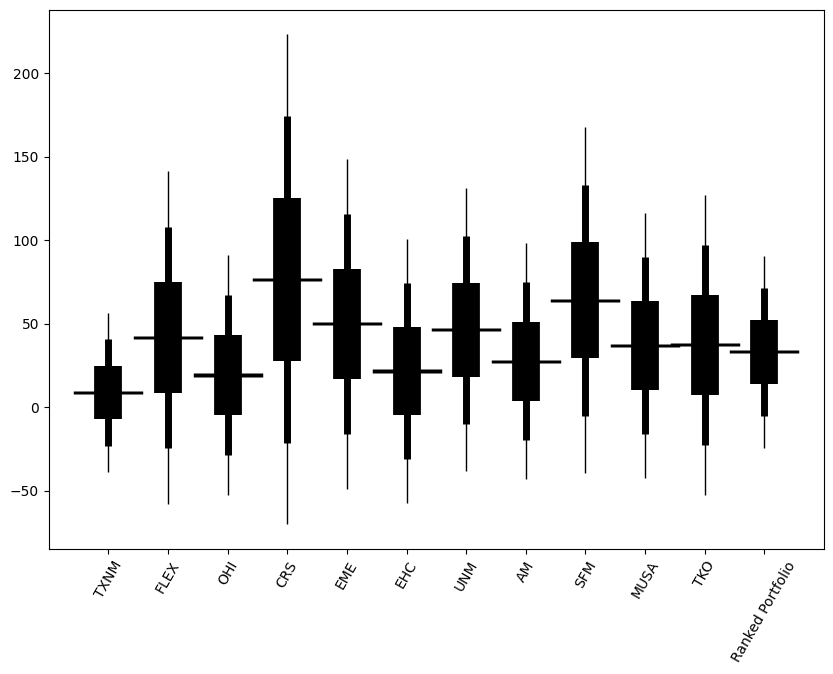

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

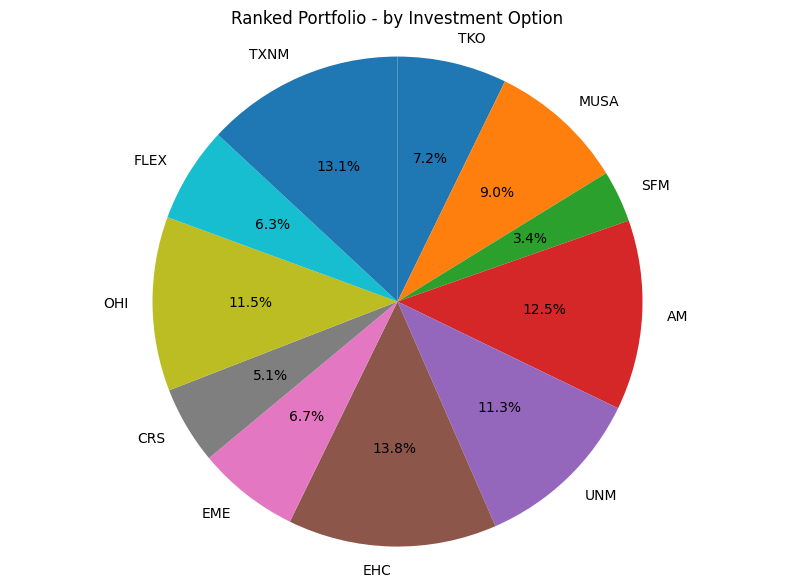

TKO    0.07
MUSA   0.09
SFM    0.03
AM     0.13
UNM    0.11
EHC    0.14
EME    0.07
CRS    0.05
OHI    0.11
FLEX   0.06
TXNM   0.13



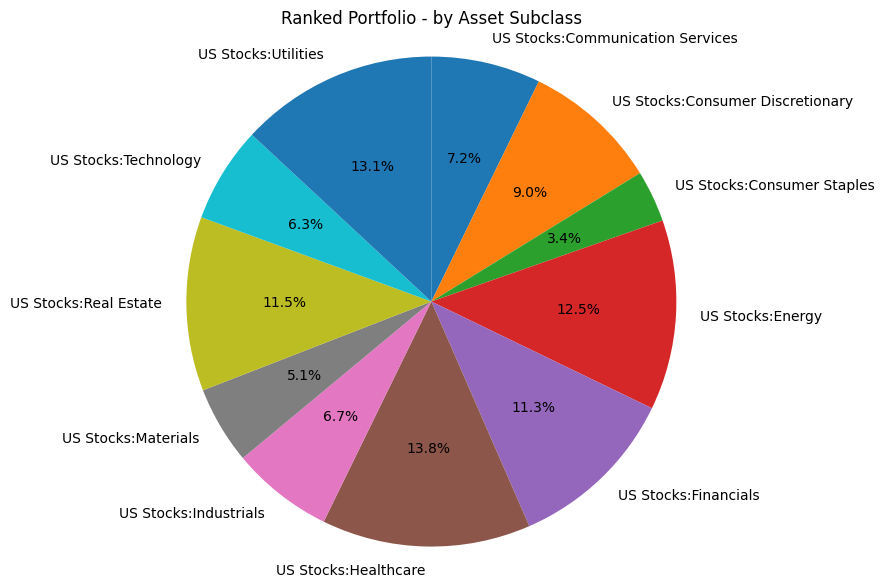

US Stocks:Communication Services   0.07
US Stocks:Consumer Discretionary   0.09
US Stocks:Consumer Staples         0.03
US Stocks:Energy                   0.13
US Stocks:Financials               0.11
US Stocks:Healthcare               0.14
US Stocks:Industrials              0.07
US Stocks:Materials                0.05
US Stocks:Real Estate              0.11
US Stocks:Technology               0.06
US Stocks:Utilities                0.13



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    TXNM                           0.1308
    FLEX                           0.0633
    OHI                            0.1149
    CRS                            0.0513
    EME                            0.0673
    EHC                            0.1379
    UNM                            0.1128
    AM                             0.1254
    SFM                            0.0342
    MUSA                           0.0899
    TKO                            0.0723


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = False

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).